In [1]:
# my custom lib
from basicModel import LeNet
from basicModel import AlexNet


from small_dataset import MNIST
from small_dataset import CIFAR10
from small_dataset import CIFAR100

In [2]:
dataset = CIFAR10(info=True).addChannel().tocategorical().Done()

dataset: 
    使用 tensorflow.keras 取得的 CIFAR10 資料集(https://keras.io/api/datasets/cifar10/) 

    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. 

    There are 50000 training images and 10000 test images.
     

one-hot encoder:
	index: 0 ,pre: [6] ,after:[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
	index: 0 ,pre: [3] ,after:[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
----------
train_x:(50000, 32, 32, 3) 
train_y:(50000, 10) 
test_x:(10000, 32, 32, 3) 
test_y:(10000, 10)


In [3]:
import tensorflow as tf

#取得模型架構
MyNet = LeNet(datasetName=dataset.className,input_shape=(32,32,3) ,classes=len(dataset.train_y[0]))


Model: "frank_LeNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               

In [4]:
initial_learning_rate = 1e-6
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

#訓練
# compile  #在每層 layer 和 compile 都可自動尋找超參數

MyNet.model.compile(
    #learning_rate=0.01
    optimizer= tf.keras.optimizers.Adam(learning_rate=lr_schedule,epsilon=1e-09),
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
)

# fit
history  = \
MyNet.model.fit(
    x = dataset.train_x,
    y = dataset.train_y,
    epochs = 5,
    batch_size = 32,
    validation_data = (dataset.test_x ,dataset.test_y)
)


Epoch 1/5
1563/1563 [==============================] - 18s 10ms/step - loss: 2.3968 - accuracy: 0.0950 - val_loss: 2.3537 - val_accuracy: 0.1038
Epoch 2/5
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3288 - accuracy: 0.1118 - val_loss: 2.3122 - val_accuracy: 0.1248
Epoch 3/5
1563/1563 [==============================] - 16s 10ms/step - loss: 2.2950 - accuracy: 0.1316 - val_loss: 2.2823 - val_accuracy: 0.1414
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 2.2675 - accuracy: 0.1494 - val_loss: 2.2551 - val_accuracy: 0.1594
Epoch 5/5
1563/1563 [==============================] - 16s 10ms/step - loss: 2.2414 - accuracy: 0.1660 - val_loss: 2.2290 - val_accuracy: 0.1733


In [5]:
#取得訓練結果
#   save the entire model as a single file
#   model = keras.models.load_model("path_to_my_model")
# model.save(f"{save_model_dir}")
MyNet.outputHelper.saveModel()

INFO:tensorflow:Assets written to: ./result/frank_LeNet/CIFAR10/2021-10-12 13:38:50/model/assets
saveModel... Done


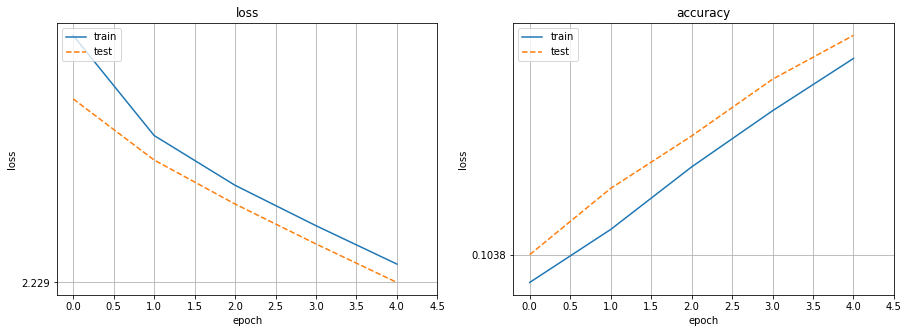

drawTrainProcess... Done


In [6]:
# print(history.history)
r = history.history
MyNet.outputHelper.drawTrainProcess(r)